In [1]:
#Importation des librairies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Chargement des fichiers de données
df_country = pd.read_csv('./data/EdStatsCountry.csv')
df_country_series = pd.read_csv('./data/EdStatsCountry-Series.csv')
df_data = pd.read_csv('./data/EdStatsData.csv')
df_footnote = pd.read_csv('./data/EdStatsFootNote.csv')
df_series = pd.read_csv('./data/EdStatsSeries.csv')

# Exploration des fichiers de données

### Exploration du fichier "EdStatsCountry"

In [3]:
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Le fichier "EdStatsCountry" est composé de **241 lignes** et **32 colonnes**.

Chaque ligne du fichier **"EdStatsCountry"** contient :
- un pays avec son nom sous différents formats (court, long)
- des informations géographiques (région du monde)
- des indications sur la monnaie ayant court dans le pays
- les années de références pour le calcul d'indice des prix
- des informations sur les systèmes et modalités de comptabilité nationale utilisés dans le pays
- des informations sur les dates des derniers rescencement de population
- les dernières enquêtes menées dans le pays ainsi que leur date

Le fichier contient des colonnes en format **"float64"** alors qu'elles contient des dates, nous allons changer ce format pour qu'elles soient sous format **"object"**.

In [5]:
df_country = df_country.astype({col: 'object' for col in df_country.select_dtypes(include=['float64']).columns})

In [6]:
#Proportion de valeurs manquantes par colonne
print(df_country.isnull().sum().divide(len(df_country)).round(2)*100)

#Nombre de colonnes contenant des valeurs nulles dans le fichier
print(f"Dans le fichier, {df_country.isnull().any().sum()} colonnes contiennent des valeurs nulles")

Country Code                                           0.0
Short Name                                             0.0
Table Name                                             0.0
Long Name                                              0.0
2-alpha code                                           1.0
Currency Unit                                         11.0
Special Notes                                         40.0
Region                                                11.0
Income Group                                          11.0
WB-2 code                                              0.0
National accounts base year                           15.0
National accounts reference year                      87.0
SNA price valuation                                   18.0
Lending category                                      40.0
Other groups                                          76.0
System of National Accounts                           11.0
Alternative conversion factor                         80

Dans le fichier, **28 colonnes contiennent des valeurs nulles** dans des proportions variables.

Certains colonnes présentent une proportion de valeurs nulles **supérieur à 50%** comme les colonnes :
- "National accounts reference year"
- "Other groups"
- "Alternative conversion factor"
- "Vital registration complete"
- "Latest industrial data"

La colonne "Unnamed: 31", est elle, entièrement vide.

Nous allons supprimer ces colonnes car elles ne seront pas utilisable.

In [7]:
#Supression des colonnes inutisables
df_country = df_country.drop(columns=['National accounts reference year',
                                      'Other groups','Alternative conversion factor',
                                      'Vital registration complete',
                                      'Latest industrial data',
                                      'Unnamed: 31'])

In [8]:
#Nombre de doublons dans le fichier
print(f"Le fichier contient {df_country.duplicated().sum()} ligne en doublon")
print(f"Le fichier contient {df_country['Short Name'].duplicated().sum()} pays en doublon")

Le fichier contient 0 ligne en doublon
Le fichier contient 0 pays en doublon


In [9]:
# Stocker toutes les proportions dans un dictionnaire
frequence_mod_country = {}

for colonne in df_country.columns:
    frequence_mod_country[colonne] = df_country[colonne].value_counts(normalize=True, dropna=False).round(3)*100

Nous avons stocker dans un dictionnaire les fréquences des modalités de chaque colonne, nous pouvons maintenant consulter ces fréquences pour chaque colonne.

In [10]:
frequence_mod_country.get("Short Name")

Short Name
Aruba           0.4
Afghanistan     0.4
Angola          0.4
Albania         0.4
Andorra         0.4
               ... 
Kosovo          0.4
Yemen           0.4
South Africa    0.4
Zambia          0.4
Zimbabwe        0.4
Name: proportion, Length: 241, dtype: float64

In [11]:
df_country['Short Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


Dans le fichier on trouve, dans la colonne correspondant aux noms des pays, certaines lignes qui ne sont pas des pays mais des groupements de pays ou des régions du monde comme **"East Asia & Pacific"**

Les "vrais" pays ont une monnaie ayant cours qui est renseignée, afin de garder seulement les "vrais" pays, nous allons récupérer les "vrais" pays pour les mettre dans une liste puis filtrer le fichier de données sur la base de cette liste.

In [12]:
Liste_Vrais_Pays = df_country[df_country['Currency Unit'].isna()==False]['Table Name'].unique()

In [13]:
df_country = df_country[df_country['Table Name'].isin(Liste_Vrais_Pays)==True]

### Exploration du fichier "EdStatsCountry-Series"

In [14]:
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [15]:
df_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Le fichier **"EdStatsCountry-Series"** contient **613 lignes** et **4 colonnes**

Chaque ligne du fichier contient :
- Le code du pays
- Les indicateurs disponibles pour chaque pays
- Une description des données contenant notamment la source

In [16]:
#Proportion de valeurs manquantes par colonne
print(df_country_series.isnull().sum().divide(len(df_country_series)).round(2)*100)

#Nombre de colonnes contenant des valeurs nulles dans le fichier
print(f"Dans le fichier, {df_country_series.isnull().any().sum()} colonnes contiennent des valeurs nulles")

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64
Dans le fichier, 1 colonnes contiennent des valeurs nulles


La colonne "Unnamed: 3" est complétement vide, nous allons donc la supprimer

In [17]:
df_country_series = df_country_series.drop(columns='Unnamed: 3')

In [18]:
#Nombre de doublons dans le fichier
print(f"Le fichier contient {df_country_series.duplicated().sum()} ligne en doublon")
print(f"Le fichier contient {df_country_series['CountryCode'].duplicated().sum()} pays en doublon")

Le fichier contient 0 ligne en doublon
Le fichier contient 402 pays en doublon


Le fichier ne contient pas de ligne en doublon, toutefois, on remarque qu'il existe plusieurs lignes pour un pays donnée.

Nous stockons dans un dictionnaire les fréquences des modalités de chaque colonne afin de pouvoir les consulter si besoin.

In [19]:
# Stocker toutes les proportions dans un dictionnaire
frequence_mod_country_series = {}

for colonne in df_country_series.columns:
    frequence_mod_country_series[colonne] = df_country_series[colonne].value_counts(normalize=True, dropna=False).round(3)*100

### Exploration du fichier "EdStatsData"

In [20]:
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Le fichier "EdStatsData" contient **886 930 lignes** et **70 colonnes**.

Chaque ligne représente un indicateur relatifs à l'éducation pour un pays donné et contient les valeurs de cette indicateur pour une période de temps allant de 1970 à 2100.
Les indicateurs ont des valeurs pour des années futures, ceux-ci correspondent à des projections réalisées pour ces indicateurs.

In [22]:
#Nombre de colonnes contenant des valeurs nulles dans le fichier
print(f"Dans le fichier, {df_data.isnull().any().sum()} colonnes contiennent des valeurs nulles")

Dans le fichier, 66 colonnes contiennent des valeurs nulles


Nous avons **66 colonnes sur 70** qui contiennent des **valeurs manquantes**. Nous allons observer dans quelles proportions ces valeurs manquantes existent pour chaque colonne.

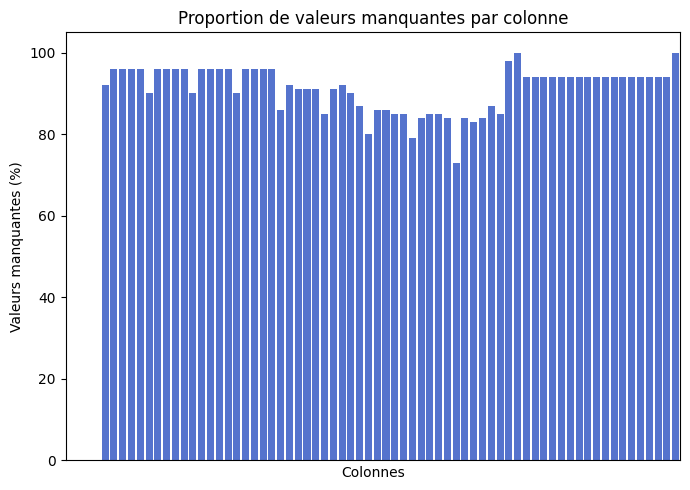

In [23]:
#On stock le dataframe contenant les proportions de valeurs manquantes dans chaque colonne
df_na = df_data.isnull().sum().divide(len(df_data)).round(2)*100

plt.figure(figsize=(7, 5))
sns.barplot(data=df_na.reset_index(), 
            x='index', y=0,
            orient='v', color='royalblue')
plt.xlabel("Colonnes")
plt.ylabel('Valeurs manquantes (%)')
plt.title('Proportion de valeurs manquantes par colonne')
plt.xticks([])
plt.tight_layout()
plt.show()

Pour les 66 colonnes concernées par la présence de valeurs manquantes, on observe que la plupart de ces colonnes contiennent plus de 80% de valeurs manquantes.
Nous allons supprimer seulement les colonnes qui sont complétement vide.

In [24]:
df_data.isna().all()[df_data.isna().all()==True]

Unnamed: 69    True
dtype: bool

Seule la colonne "Unnamed: 69" est complétement vide, nous allons donc la supprimer.

In [25]:
df_data = df_data.drop(columns='Unnamed: 69')

In [26]:
#Nombre de doublons dans le fichier
print(f"Le fichier contient {df_data.duplicated().sum()} ligne en doublon")
print(f"Le fichier contient {df_data['Country Code'].duplicated().sum()} pays en doublon")

Le fichier contient 0 ligne en doublon
Le fichier contient 886688 pays en doublon


Le fichier ne contient pas de ligne en doublon, toutefois, on observe qu'il existe plusieurs lignes pour un seul et même pays, ceci s'explique par le fait que plusieurs indicateurs sont renseignés pour un seul pays.

### Exploration du fichier "EdStatsFootNote"

In [27]:
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [28]:
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


Le fichier contient **643 638 lignes** et **5 colonnes**.

Chaque ligne contient des informations sur les indicateurs disponibles pour chaque pays et pour plusieurs années, ainsi que la source de ces indicateurs.

In [29]:
#Proportion de valeurs manquantes par colonne
print(df_footnote.isnull().sum().divide(len(df_footnote)).round(2)*100)

#Nombre de colonnes contenant des valeurs nulles dans le fichier
print(f"Dans le fichier, {df_footnote.isnull().any().sum()} colonnes contiennent des valeurs nulles")

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64
Dans le fichier, 1 colonnes contiennent des valeurs nulles


Seule la colonne "Unnamed: 4" contient des valeurs manquantes, elle est même complétement vide, nous allons donc la supprimer.

In [30]:
df_footnote = df_footnote.drop(columns='Unnamed: 4')

In [31]:
#Nombre de doublons dans le fichier
print(f"Le fichier contient {df_footnote.duplicated().sum()} ligne en doublon")
print(f"Le fichier contient {df_footnote['CountryCode'].duplicated().sum()} pays en doublon")

Le fichier contient 0 ligne en doublon
Le fichier contient 643399 pays en doublon


Le fichier ne contient pas de ligne en doublon.

### Exploration du fichier "EdStatsSeries"

In [32]:
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Le fichier est composé de **3665 lignes** et **21 colonnes**.

Chaque ligne représente un indicateur identifié notamment par un code ainsi que des informations sur le périmètre et sur la construction de cet indicateur.

In [34]:
#Proportion de valeurs manquantes par colonne
print(df_series.isnull().sum().divide(len(df_series)).round(2)*100)

#Nombre de colonnes contenant des valeurs nulles dans le fichier
print(f"Dans le fichier, {df_series.isnull().any().sum()} colonnes contiennent des valeurs nulles")

Series Code                              0.0
Topic                                    0.0
Indicator Name                           0.0
Short definition                        41.0
Long definition                          0.0
Unit of measure                        100.0
Periodicity                             97.0
Base Period                             91.0
Other notes                             85.0
Aggregation method                      99.0
Limitations and exceptions             100.0
Notes from original source             100.0
General comments                       100.0
Source                                   0.0
Statistical concept and methodology     99.0
Development relevance                  100.0
Related source links                    94.0
Other web links                        100.0
Related indicators                     100.0
License Type                           100.0
Unnamed: 20                            100.0
dtype: float64
Dans le fichier, 16 colonnes contiennent

Le fichier contient 16 colonnes avec des valeurs manquantes, souvent avec des proportions importantes (plus de 85%).

Nous allons dans un premier temps supprimer seulement les colonnes entièrement vides ainsi que la colonne contenant une courte définition de l'indicateur faisant doublon avec celle contenant une longue définition et étant partielle vide.

In [35]:
df_series = df_series[['Series Code','Topic','Indicator Name','Long definition','Source']]

In [36]:
#Nombre de doublons dans le fichier
print(f"Le fichier contient {df_series.duplicated().sum()} ligne en doublon")
print(f"Le fichier contient {df_series['Series Code'].duplicated().sum()} indicateur en doublon")

Le fichier contient 0 ligne en doublon
Le fichier contient 0 indicateur en doublon


Le fichier ne contient aucune ligne en doublon et chaque indicateur est unique.

# Réduction du périmètre des indicateurs

La seconde étape du travail consiste à réduire le périmètre des indicateurs présent dans les différents fichiers de données. 

### Réduction du périmètre par une approche métier

D'abord, nous allons utiliser une approche métier afin de réduire une première fois le périmètre des indicateurs.

Pour cela, nous allons nous servir du fichier "Series" qui contient une colonne "Topic" référencant la catégorie de l'indicateur.

In [37]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Pour répondre à la problématique métier, nous allons sélectionner les catégories :

- Secondary
- Tertiary
- Post-Secondary/Non-Tertiary
- Economic Policy & Debt : Purchasing power parity
- Infrastructure: Communications

Ces catégories nous permettent de garder seulement les indicateurs relatifs aux nombres d'élèves en lycée et université, à la couverture internet dans le pays ainsi que le pouvoir d'achat.

In [38]:
df_series_filtered = df_series[df_series['Topic'].isin(['Secondary',
                                                        'Tertiary',
                                                        'Post-Secondary/Non-Tertiary',
                                                        'Economic Policy & Debt: Purchasing power parity',
                                                        'Infrastructure: Communications'])]

In [39]:
df_series_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 610 to 3580
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      441 non-null    object
 1   Topic            441 non-null    object
 2   Indicator Name   441 non-null    object
 3   Long definition  441 non-null    object
 4   Source           441 non-null    object
dtypes: object(5)
memory usage: 20.7+ KB


Après avoir filtrer le fichier sur la base de ces catégories d'indicateurs, nous passons de **3665 indicateurs** à **441 indicateurs**.

Nous récupérer la liste des indicateurs sélectionnés pour également filtrer les autres fichiers de données.

In [40]:
Liste_Indicateur = df_series_filtered['Series Code'].tolist()

In [41]:
df_country_series_filtered = df_country_series[df_country_series['SeriesCode'].isin(Liste_Indicateur)]

df_data_filtered = df_data[df_data['Indicator Code'].isin(Liste_Indicateur)]

df_footnote = df_footnote[df_footnote['SeriesCode'].isin(Liste_Indicateur)]

In [42]:
df_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102366 entries, 0 to 886610
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    102366 non-null  object 
 1   Country Code    102366 non-null  object 
 2   Indicator Name  102366 non-null  object 
 3   Indicator Code  102366 non-null  object 
 4   1970            4107 non-null    float64
 5   1971            11311 non-null   float64
 6   1972            11078 non-null   float64
 7   1973            11097 non-null   float64
 8   1974            11178 non-null   float64
 9   1975            10622 non-null   float64
 10  1976            11494 non-null   float64
 11  1977            11840 non-null   float64
 12  1978            11668 non-null   float64
 13  1979            11385 non-null   float64
 14  1980            11103 non-null   float64
 15  1981            11385 non-null   float64
 16  1982            10905 non-null   float64
 17  1983           

Le fichier "Data", le plus conséquent des fichiers, passe ainsi de **886 610 lignes** à **102 366 lignes**

### Réduction du périmètre par une approche par la données

Après avoir réduit le périmètre par une approche métier, nous allons continuer ce travail de réduction de périmètre par une approche par la données.

Le fichier "Data" contient les valeurs d'indicateurs pour chaque pays pour une période de temps allant de 1970 à 2100. En observant la proportion de valeurs manquantes, on observe que des années ont une part importante de valeurs manquantes. Afin d'avoir une qualité de données suffisante nous allons garder seulement les années les plus fournies en valeurs renseignées sur une période de 5 ans permettant d'observer des tendances.

Ces années sont celles allant de 2008 à 2013.

Nous allons donc garder seulement ces années pour la suite de l'analyse.

In [43]:
df_data_filtered = df_data_filtered[['Country Name',
                                     'Country Code',
                                     'Indicator Name',
                                     'Indicator Code',
                                     '2008',
                                     '2009',
                                     '2010',
                                     '2011',
                                     '2012',
                                     '2013']]

In [44]:
#Liste des colonnes correspondant aux années
year_columns = [col for col in df_data_filtered if col.isdigit()]

#Calcul de la propotion de valeurs nulles pour chaque années
proportion_nulles = df_data_filtered[year_columns].isna().sum()/len(df_data_filtered)

proportion_nulles.sort_index().round(2)*100

2008    60.0
2009    60.0
2010    60.0
2011    59.0
2012    59.0
2013    58.0
dtype: float64

Toutes les années sélectionnées contiennent une proportion de valeurs manquantes assez proche, comprise entre 58% et 60%.

In [45]:
df_data_filtered.groupby('Indicator Name')[year_columns].apply(lambda x: x.notnull().any().sum())/len(year_columns)

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               1.0
Adjusted net enrolment rate, lower secondary, female (%)                   1.0
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    1.0
Adjusted net enrolment rate, lower secondary, male (%)                     1.0
Adjusted net enrolment rate, upper secondary, both sexes (%)               1.0
                                                                          ... 
Total net enrolment rate, lower secondary, gender parity index (GPI)       1.0
Total net enrolment rate, lower secondary, male (%)                        1.0
Under-age enrolment ratio in secondary education, both sexes (%)           1.0
Under-age enrolment ratio in secondary education, female (%)               1.0
Under-age enrolment ratio in secondary education, male (%)                 1.0
Length: 423, dtype: float64

Ainsi, tous les indicateurs sélectionnés contiennent des valeurs manquantes.

Nous allons maintenant utiliser **pivot_table** afin d'obtenir un Dataframe dont chaque ligne correspond à un indicateur, chaque colonne à une année et la valeur des cellules au nombre de valeurs renseignées. De plus, nous ajoutons une colonne "Total" qui est la somme du nombre de valeurs renseignées sur les années.

Ceci nous permettra de réduire encore le périmètre des indicateurs en sélectionnant ceux qui sont les plus fournies.

In [46]:
df_indicateur_annees = df_data_filtered.pivot_table(index='Indicator Name', values=year_columns, aggfunc=lambda x: x.notna().sum(), fill_value=0)

df_indicateur_annees['Total'] = df_indicateur_annees.sum(axis=1)

In [47]:
df_indicateur_annees.sort_values('Total', ascending=False).head(60)

,2008,2009,2010,2011,2012,2013,Total
Indicator Name,,,,,,,
Internet users (per 100 people),228,227,227,229,227,226,1364
"GDP, PPP (current international $)",215,215,215,217,213,213,1288
"GDP, PPP (constant 2011 international $)",215,215,215,217,213,213,1288
"GDP per capita, PPP (constant 2011 international $)",215,215,215,217,213,213,1288
"GDP per capita, PPP (current international $)",215,215,215,217,213,213,1288
"GNI, PPP (current international $)",213,213,213,213,211,211,1274
"GNI per capita, PPP (current international $)",213,213,213,213,211,211,1274
Official entrance age to lower secondary education (years),205,205,205,204,204,205,1228
Theoretical duration of upper secondary education (years),205,205,205,204,204,205,1228


Nous gardons une quinzaine d'indicateurs que nous allons mettre dans une liste afin de filtrer le dataframe.

In [48]:
Liste_Indicateur_Final = ['Internet users (per 100 people)',
                          'GDP per capita, PPP (constant 2011 international $)',
                          'GNI per capita, PPP (current international $)',
                          'Theoretical duration of upper secondary education (years)',
                          'Theoretical duration of secondary education (years)',
                          'Enrolment in lower secondary general, both sexes (number)',
                          'Enrolment in secondary general, both sexes (number)',
                          'Enrolment in upper secondary general, both sexes (number)',
                          'Enrolment in lower secondary education, both sexes (number)',
                          'Enrolment in secondary education, both sexes (number)',
                          'Enrolment in upper secondary education, both sexes (number)',
                          'Enrolment in tertiary education, all programmes, both sexes (number)',
                          'Gross enrolment ratio, lower secondary, both sexes (%)',
                          'Gross enrolment ratio, upper secondary, both sexes (%)',
                          'Gross enrolment ratio, secondary, both sexes (%)'
                          ]

In [49]:
df_data_filtered = df_data_filtered[df_data_filtered['Indicator Name'].isin(Liste_Indicateur_Final)]

In [50]:
df_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 1159 to 886252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3630 non-null   object 
 1   Country Code    3630 non-null   object 
 2   Indicator Name  3630 non-null   object 
 3   Indicator Code  3630 non-null   object 
 4   2008            2873 non-null   float64
 5   2009            2883 non-null   float64
 6   2010            2827 non-null   float64
 7   2011            2881 non-null   float64
 8   2012            2849 non-null   float64
 9   2013            2757 non-null   float64
dtypes: float64(6), object(4)
memory usage: 312.0+ KB


Après avoir filtrer les indicateurs, notre dataframe "Data" contient maintenant **3630 lignes**.

Pour procéder à l'analyse statistiques et proposer des stratégies business, nous avons besoin d'avoir un dataframe avec, une ligne par pays et chaque colonne correspond à un indicateur sélectionné. La valeur des cellules est la moyenne des indicateurs sur les années sélectionnées.

In [51]:
df_indicateur_pays = pd.melt(df_data_filtered,
                             id_vars=['Country Name', 'Indicator Name'],
                             value_vars=['2008', '2009', '2010', '2011', '2012', '2013'],
                             var_name='Year',
                             value_name='Value')

df_indicateur_pays = df_indicateur_pays.pivot_table(index='Country Name',
                                                    columns='Indicator Name',
                                                    values='Value',
                                                    aggfunc='mean')

In [52]:
df_indicateur_pays.head(5)

Indicator Name,"Enrolment in lower secondary education, both sexes (number)","Enrolment in lower secondary general, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GDP per capita, PPP (constant 2011 international $)","GNI per capita, PPP (current international $)","Gross enrolment ratio, lower secondary, both sexes (%)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
Country Name,,,,,,,,,,,,,,,
Afghanistan,1.397166e+06,1.397166e+06,2.058104e+06,2.038956e+06,96344.5,6.609377e+05,6.417895e+05,1626.290236,1635.000000,65.408922,51.364192,35.113122,4.290758,6.000000,3.000000
Albania,2.100050e+05,2.100050e+05,3.613005e+05,3.390537e+05,129136.0,1.512955e+05,1.290487e+05,9945.939903,9628.333333,96.082579,89.481876,81.899893,45.152660,7.166667,3.166667
Algeria,3.233830e+06,2.899988e+06,4.437360e+06,4.078203e+06,1189070.0,1.203531e+06,1.178215e+06,12930.744736,12701.666667,123.154295,91.714499,54.447580,14.918333,7.000000,3.000000
Andorra,2.900167e+03,2.900167e+03,4.071667e+03,3.746000e+03,496.0,1.171500e+03,8.458333e+02,NaN,NaN,NaN,NaN,NaN,81.834071,6.000000,2.000000
Angola,5.025782e+05,3.696622e+05,7.731820e+05,4.435772e+05,180738.5,2.706038e+05,7.391500e+04,5979.401192,5338.333333,32.565110,26.556767,19.788485,4.250000,6.000000,3.000000


### Analyse statistiques

Parmi les indicateurs les plus fournis qui ont été sélectionnés, certains semble proche et pourraient donc être redondant. Pour s'assurer de cette redondance et pour éliminer les indicateurs qui le seraient, nous allons observer les matrices de corrélations.

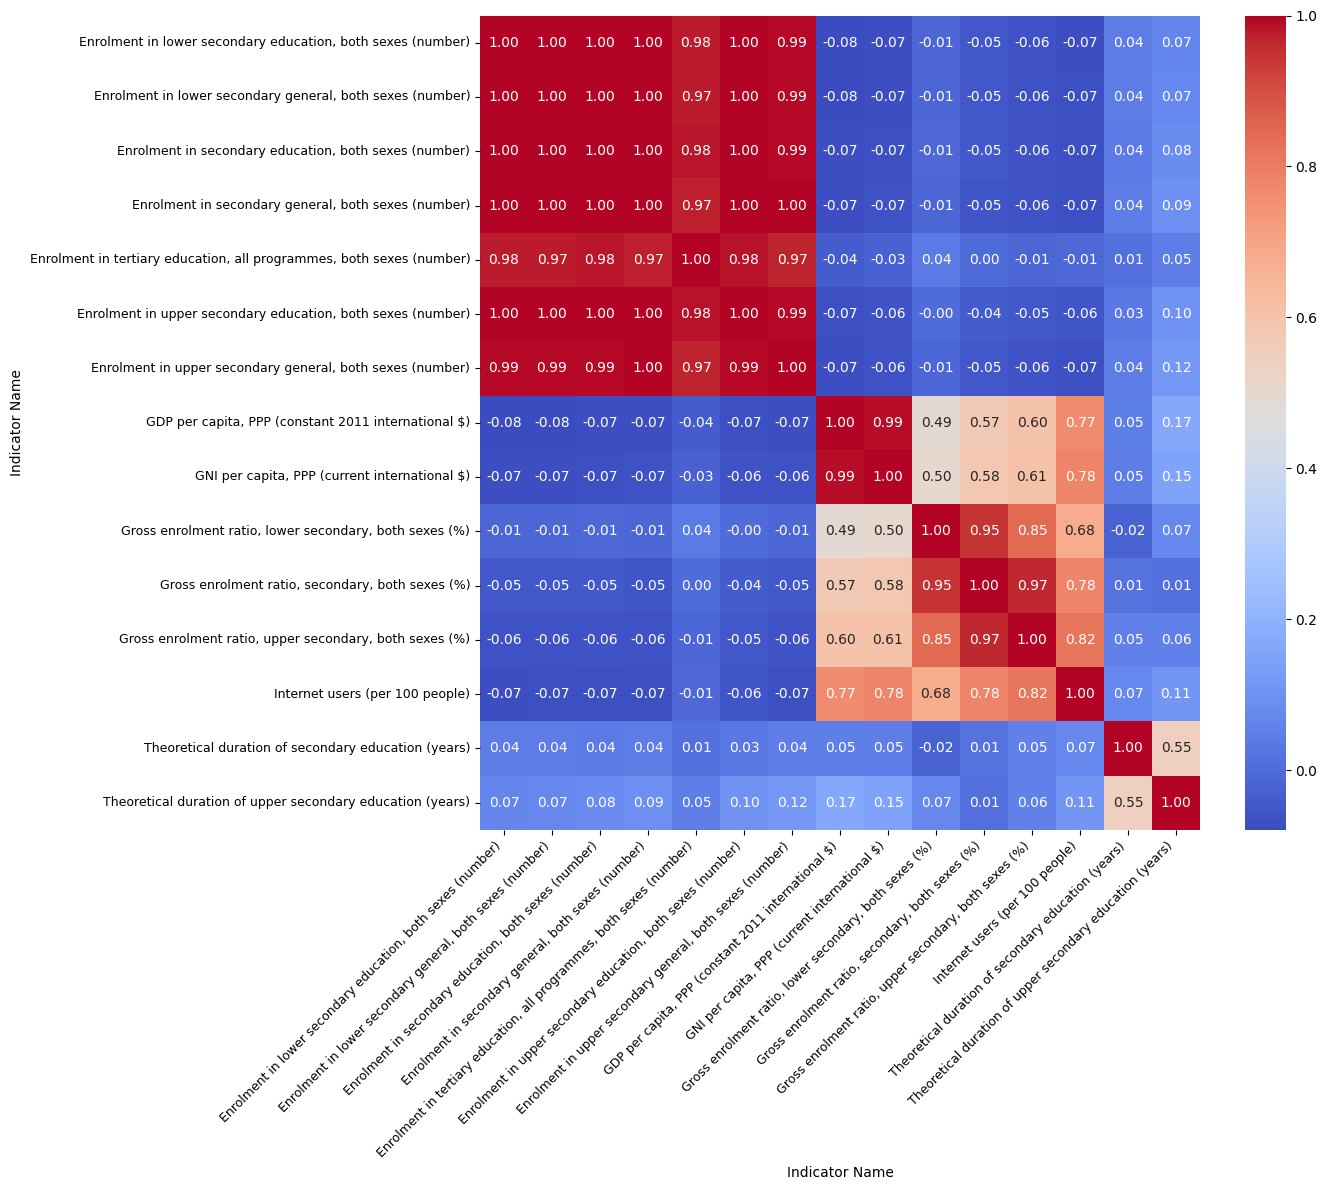

In [53]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_indicateur_pays.corr(method='pearson'), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

La matrice de corrélation avec la méthode de Pearson montre des corrélations très importantes (>> 80%), pouvant indiquer une redondance importante entre des indicateurs.

Ici, nous allons mobiliser pour l'analyse seulement la méthode de Pearson et non celle de Spearman car les variables ne sont pas des variables ordinales, ainsi le coefficient de Spearman n'est pas pertinent.

Pour la suite, nous allons donc éliminer les indicteurs qui sont redondant entre eux, notamment ceux relatifs au nombre d'élèves au collège/lycée et université.

In [54]:
df_indicateur_pays = df_indicateur_pays[['GDP per capita, PPP (constant 2011 international $)',
                    'Internet users (per 100 people)',
                    'Enrolment in secondary general, both sexes (number)',
                    'Enrolment in tertiary education, all programmes, both sexes (number)',
                    'Theoretical duration of secondary education (years)'
                    ]]

In [55]:
df_indicateur_pays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   GDP per capita, PPP (constant 2011 international $)                   217 non-null    float64
 1   Internet users (per 100 people)                                       229 non-null    float64
 2   Enrolment in secondary general, both sexes (number)                   221 non-null    float64
 3   Enrolment in tertiary education, all programmes, both sexes (number)  200 non-null    float64
 4   Theoretical duration of secondary education (years)                   205 non-null    float64
dtypes: float64(5)
memory usage: 11.1+ KB


Avant de procéder à l'analyse descriptive des variables, nous allons d'abord renommer ces variables pour améliorer la lisibilité des analyses.

In [56]:
dict_chg_nom_var = {'GDP per capita, PPP (constant 2011 international $)':'PIB par habitant ($)',
                    'Internet users (per 100 people)' : 'Part des personnes connectées à Internet (%)',
                    'Enrolment in secondary general, both sexes (number)' : 'Effectifs enseignement secondaire',
                    'Enrolment in tertiary education, all programmes, both sexes (number)' : 'Effectifs enseignement supérieur',
                    'Theoretical duration of secondary education (years)' : 'Durée de l\'enseignement secondaire'
                    }

df_indicateur_pays = df_indicateur_pays.rename(columns=dict_chg_nom_var)

### Analyse descriptive

Tout d'abord, nous allons regarder les statistiques descriptives des différents indicteurs.

In [57]:
stat_descrip = df_indicateur_pays.describe()

#Calcul du rapport interquartile
iqr = df_indicateur_pays.quantile(0.75)/df_indicateur_pays.quantile(0.25)
iqr.name = "IQR"

#Calcul du coefficient de variation
cv = df_indicateur_pays.std()/df_indicateur_pays.mean()
cv.name = "CV"

#Ajout du rapport interquartile et du coefficient de variation au dataframe describe
stat_descrip = pd.concat([stat_descrip,iqr.to_frame().T]).round(2)
stat_descrip = pd.concat([stat_descrip,cv.to_frame().T]).round(2)

stat_descrip

Indicator Name,PIB par habitant ($),Part des personnes connectées à Internet (%),Effectifs enseignement secondaire,Effectifs enseignement supérieur,Durée de l'enseignement secondaire
count,217.00,229.00,2.210000e+02,2.000000e+02,205.00
mean,17757.31,35.30,1.487185e+07,6.026399e+06,6.34
std,19767.47,26.93,5.634018e+07,2.093264e+07,0.92
min,626.14,0.00,9.450000e+02,3.500000e+00,4.00
25%,3491.73,9.54,1.028950e+05,4.272679e+04,6.00
50%,11113.05,31.35,5.078398e+05,2.299138e+05,6.00
75%,24560.43,56.29,2.831394e+06,1.741621e+06,7.00
max,123202.95,94.16,4.907805e+08,1.841105e+08,9.00
IQR,7.03,5.90,2.752000e+01,4.076000e+01,1.17
CV,1.11,0.76,3.790000e+00,3.470000e+00,0.14


##### PIB par habitant :
Le PIB par habitant est très hétérogène, on observe un coefficient de variation entre l'écart-type et la moyenne de 1,11 indiquant une dispersion très importante. De plus, le rapport interquartile égal à 7 montre des disparités importantes entre les pays les plus pauvres et ceux les plus riches en termes de PIB par habitant. La moyenne est nettement supérieur à la médiane indiquant qu'un petit nombre de pays tire la moyenne vers le haut. 

##### Internet users :
La couverture internet est elle aussi très disparate entre les pays. Le coefficient de variation entre l'écart-type et la moyenne est de 0,76 montrant une forte dispersion. Ceci est confirmé par le rapport interquartile presque égal à 6. Nous pouvons supposer que des pays sont encore très peu connectés alors que d'autres sont proches des 100% de personnes connectées à Internet.

##### Effectifs dans l'enseignement secondaire et le supérieur
Concernant les effectifs dans l'enseignement secondaire et le supérieur, il en est de même. On observe une forte dispersion avec un coefficient de variation entre l'écart-type et la moyenne égal à 3,8 pour l'enseignement secondaire et de 3,5 pour l'enseignement supérieur. Cette observation est également confirmée par le rapport interquartile de 27,5 pour l'enseignement secondaire et de 40,8 pour l'enseignement supérieur. De plus, les moyennes sont bien supérieure aux médianes, indiquant qu'un petit nombre de pays tirent la moyenne vers le haut.

##### Durée théorique de l'enseignement secondaire
Pour la durée théorique dans l'enseignement secondaire, cette fois-ci, on observe une faible dispersion avec un coefficient de variation entre l'écart-type et la moyenne de 0,9 et un rapport interquartile de 1,2. Cette variable est assez homogène entre les pays.

Afin de mieux visualiser la distribution de chaque variable, nous allons tracer les histogramme de distribution.

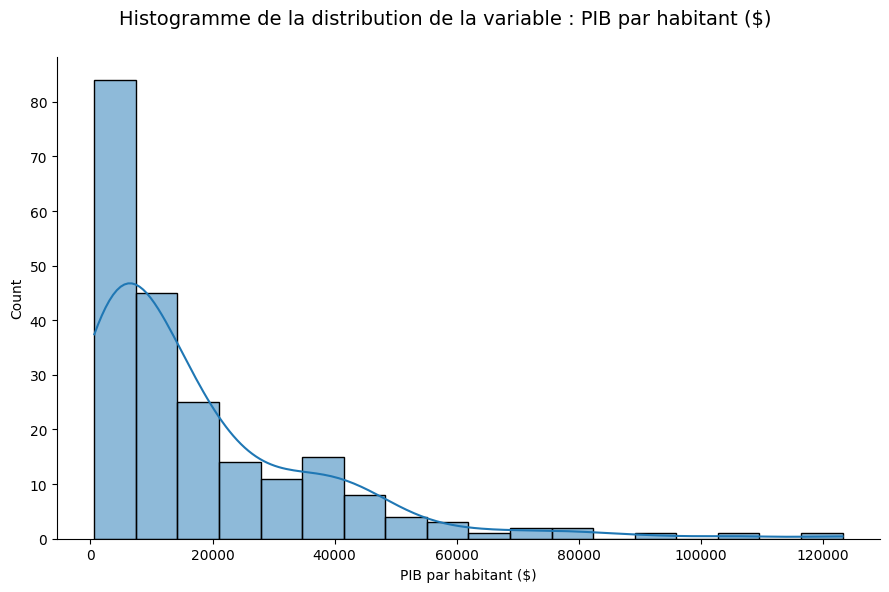

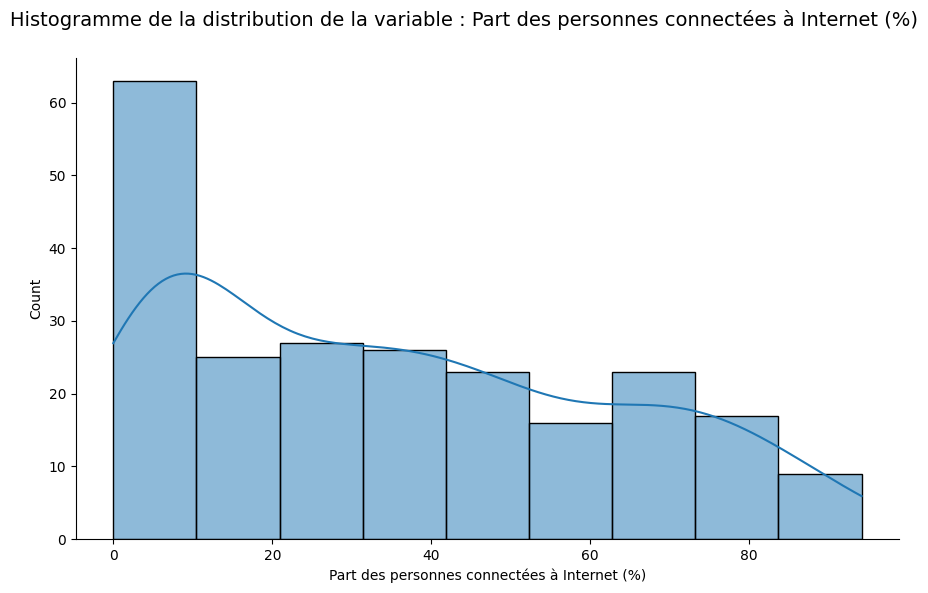

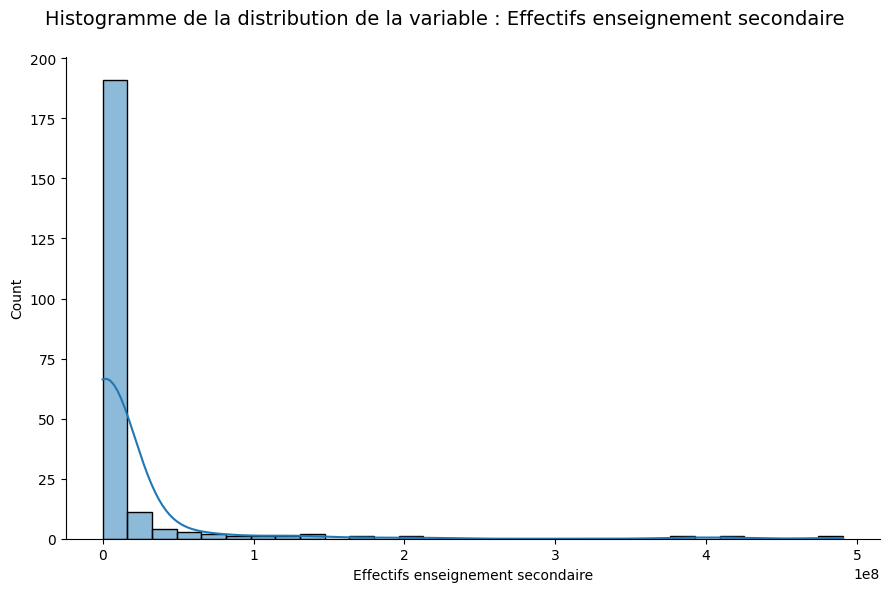

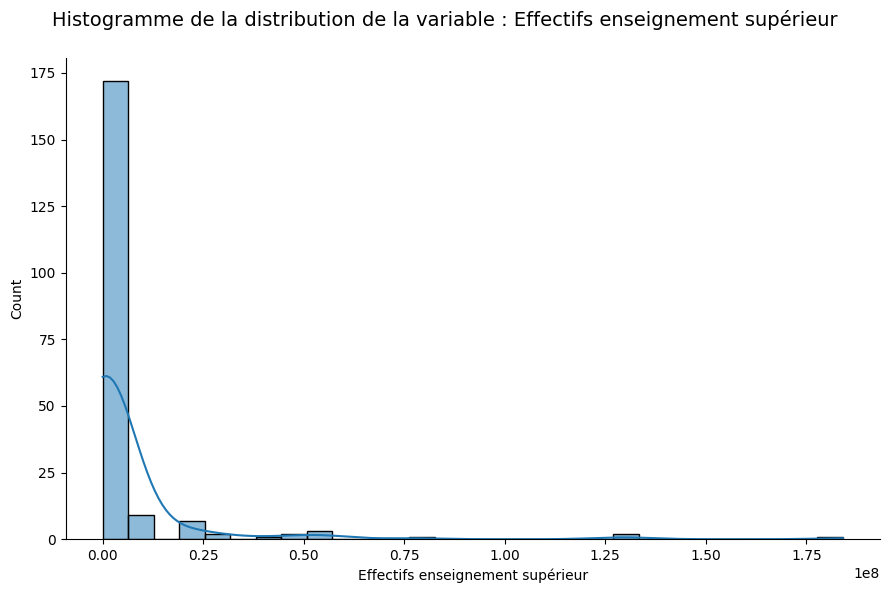

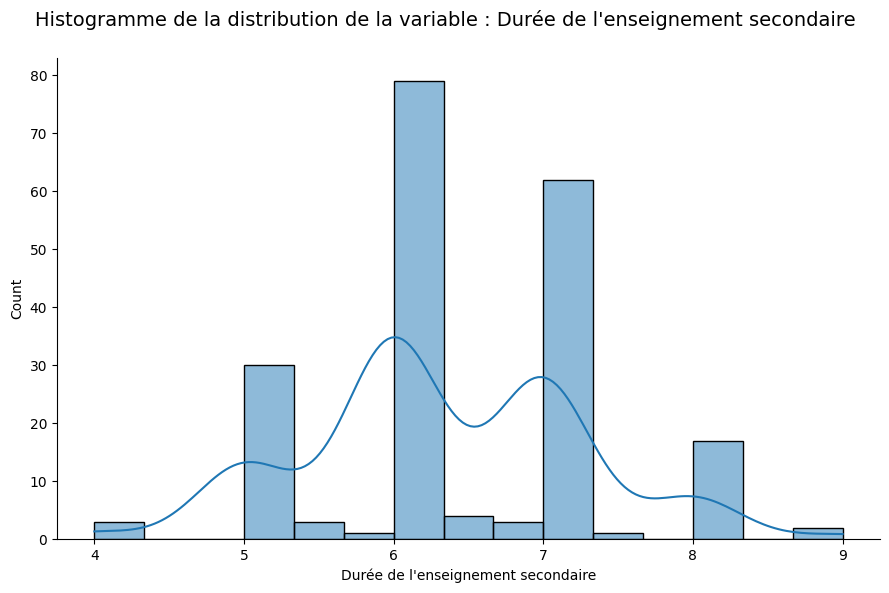

In [58]:
for col in df_indicateur_pays.columns:
    g = sns.displot(df_indicateur_pays[col], kde=True, height=6, aspect=1.5)
    g.figure.suptitle(f"Histogramme de la distribution de la variable : {col}", fontsize=14)
    g.figure.subplots_adjust(top=0.9)

Les histogrammes confirment les analyses descriptives, pour le PIB par habitant, la couverture Internet ainsi que les effectifs dans le secondaire et le supérieur, on observe que pour la plus part des pays ces variables sont au début de la distribution et que ce sont bien un petit nombre de pays qui tirent les moyennes vers le haut.

Afin de pouvoir formuler des stratégies business, nous avons besoin d'identifier les pays qui présentent un fort potentiel pour l'implantation d'academy aujourd'hui dans d'autres pays mais également ceux qui pourraient représenter des marchés émergent pour une implantation future.

Pour cela, nous allons classifier les pays en fonction de l'ensemble des variables afin de composer des groupes que nous pourrons analyser plus en profondeur par la suite.

Pour composer ces groupes de pays, nous avons opter pour une méthode d'analyse factorielle (Analyse des composantes principales) couplé à un algorithme de classification (K-Means) qui permettront d'obtenir des groupes homogènes en leur sein et hétérogènes entre eux.

In [59]:
#Importation des librairies pour l'analyse factorielle (ACP) et la classification (KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [60]:
df_ACP = df_indicateur_pays.dropna()

X = StandardScaler().fit_transform(df_ACP)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print(f"Variance expliquée : {pca.explained_variance_ratio_}")

Variance expliquée : [0.38276566 0.35245612 0.19732471 0.04891857 0.01853494]


L'ACP permet de positionner chaque pays les uns par rapport aux autres en fonction de l'ensemble des variables, les pays avec des valeurs de variables proches présenteront une similarité plus importante.

Pour composer les groupes, nous avons besoin de délimiter les contours de ces groupes. Pour cela, nous allons détecter quels pays se ressemblent le plus entre eux et lesquels sont différents. 

Pour choisir le nombre de groupes de pays, nous allons utiliser la méthode dite du "coude" qui permet de déterminer le nombre optimal de groupe en observant à partir de combien de groupe, la réduction de la variation au sein des groupes devient négligeable.

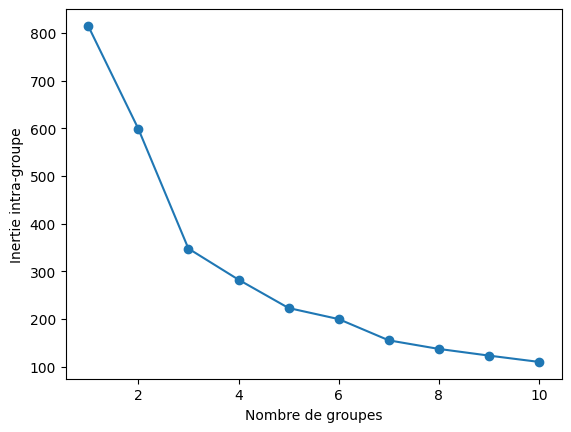

In [61]:
distortions = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de groupes')
plt.ylabel('Inertie intra-groupe')
plt.show()

Sur le graphique, on voit clairement qu'à partir de 3 groupes, l'inertie intra-groupe diminue moins fortement, on observe un "coude". Ainsi, le nombre de 3 groupes semblent le plus optimal pour notre classification.

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X_pca)

df_ACP['Cluster'] = clusters

/tmp/ipykernel_72228/2336979582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ACP['Cluster'] = clusters


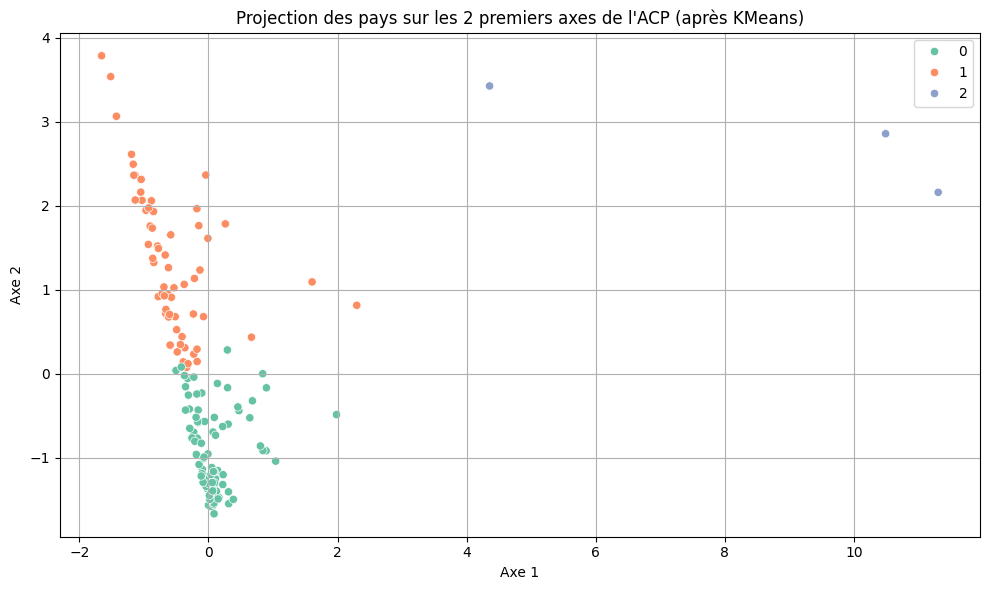

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.title('Projection des pays sur les 2 premiers axes de l\'ACP (après KMeans)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
df_ACP['Cluster'].value_counts()

Cluster
0    96
1    64
2     3
Name: count, dtype: int64

In [65]:
df_ACP[df_ACP['Cluster']==2].index

Index(['China', 'India', 'United States'], dtype='object', name='Country Name')

Après la classification, on observe donc 3 groupes de pays. Le groupe 0, en vert sur le graphique, est le groupe le plus important avec 96 pays. Le groupe 1, lui, est composé de 64 pays. Enfin, le groupe 2 est seulement composé de 3 pays, la China, l'Inde et les USA.

Afin de déterminer quelles variables structure nos groupes, nous allons regarder les contributions de chaque variable aux différents axes de l'ACP.

In [66]:
loadings = pca.components_.T 
explained_variance = pca.explained_variance_ratio_

contributions = pd.DataFrame(
    (loadings ** 2),
    index=df_ACP.drop(columns='Cluster').columns,
    columns=[f'Axe {i+1}' for i in range(5)]
)

contributions = contributions.divide(contributions.sum(axis=0), axis=1) * 100

print("Contributions des variables aux axes (en %):")
print(contributions.round(2))

Contributions des variables aux axes (en %):
                                              Axe 1  Axe 2  Axe 3  Axe 4  \
Indicator Name                                                             
PIB par habitant ($)                           4.64  43.91   1.57  49.71   
Part des personnes connectées à Internet (%)   3.97  45.37   0.40  48.76   
Effectifs enseignement secondaire             47.16   2.82   0.00   0.81   
Effectifs enseignement supérieur              44.23   5.92   0.25   0.54   
Durée de l'enseignement secondaire             0.00   1.98  97.77   0.17   

                                              Axe 5  
Indicator Name                                       
PIB par habitant ($)                           0.16  
Part des personnes connectées à Internet (%)   1.51  
Effectifs enseignement secondaire             49.20  
Effectifs enseignement supérieur              49.06  
Durée de l'enseignement secondaire             0.08  


L'axe 1 est quasi entièrement structuré par les effectifs de l'enseignement secondaire et supérieur. Ainsi, les pays seront positionnés sur cet axe en fonction de ces variables.
L'axe 2 est quasi entièrement strucutré par le PIB par habitant et la part des personnes connectées à Internet dans le pays. Ainsi, les pays seront positionnées sur cet axe en fonction de ces variables.

Por caractériser ces groupes, nous allons regarder les moyennes des variables au sein de chaque groupe puis identifier les principales différences entre les groupes à partir de tests statistiques.

In [67]:
df_ACP.groupby('Cluster').mean().round(2)

Indicator Name,PIB par habitant ($),Part des personnes connectées à Internet (%),Effectifs enseignement secondaire,Effectifs enseignement supérieur,Durée de l'enseignement secondaire
Cluster,,,,,
0,6427.74,17.55,1826815.92,529513.32,6.17
1,37645.09,64.74,1450376.68,843562.74,6.70
2,21445.44,38.86,70555758.11,24701565.67,6.33


Afin de déterminer quels tests statistiques nous allons mobiliser pour analyser les différences entre les pays, nous allons d'abord tester la normalité des ditributions de variables. En observant les histogrammes de distribution, les variables ne semblent pas suivre une loi normale, toutefois, nous allons confirmer cette observation par un test de Shapiro-Wilk.

In [68]:
from scipy.stats import shapiro

for col in df_ACP.columns:
    if col != 'Cluster':
        stat, p = shapiro(df_ACP[col])
        print(f"{col} : W = {stat:.3f}, p = {p:.4f}")
        if p < 0.05:
            print("  → Distribution non normale")
        else:
            print("  → Distribution normale")

PIB par habitant ($) : W = 0.781, p = 0.0000
  → Distribution non normale
Part des personnes connectées à Internet (%) : W = 0.928, p = 0.0000
  → Distribution non normale
Effectifs enseignement secondaire : W = 0.240, p = 0.0000
  → Distribution non normale
Effectifs enseignement supérieur : W = 0.302, p = 0.0000
  → Distribution non normale
Durée de l'enseignement secondaire : W = 0.913, p = 0.0000
  → Distribution non normale


Les tests de Shapiro-Wilk nous montre qu'aucune variable ne suit une loi normale. Nous allons donc nous orienter vers un test de Kruskal-Wallis pour déterminer s'il existe une différence globale entre les groupes pour chaque variable. S'il existe une différence significative pour une variable donnée, nous réaliserons un test de Dunn afin d'identifier quels groupes diffèrent significativement.

In [69]:
import scikit_posthocs as sp
from scipy.stats import kruskal

# Liste des variables à tester
variables = ['PIB par habitant ($)',
             'Part des personnes connectées à Internet (%)',
             'Effectifs enseignement secondaire',
             'Effectifs enseignement supérieur',
             "Durée de l'enseignement secondaire"]

for col in variables:
    print(f"Variable : {col}")
    
    # Test de Kruskal-Wallis global
    stat, p = kruskal(
        df_ACP[df_ACP['Cluster'] == 0][col],
        df_ACP[df_ACP['Cluster'] == 1][col],
        df_ACP[df_ACP['Cluster'] == 2][col]
    )
    print(f"  H = {stat:.2f}, p = {p:.4f}")
    
    if p < 0.05:
        print("Différence globale significative")

        # Test de Dunn post-hoc avec correction de Bonferroni
        result = sp.posthoc_dunn(
            df_ACP, 
            val_col=col, 
            group_col='Cluster', 
            p_adjust='bonferroni'
        )
        print("Résultats du test de Dunn (p-values ajustées) :")
        print(result.round(4))
    else:
        print("Pas de différence significative, pas de test post-hoc.")
    
    print("\n" + "-"*70 + "\n")

Variable : PIB par habitant ($)
  H = 107.11, p = 0.0000
Différence globale significative
Résultats du test de Dunn (p-values ajustées) :
        0       1       2
0  1.0000  0.0000  0.3771
1  0.0000  1.0000  0.5753
2  0.3771  0.5753  1.0000

----------------------------------------------------------------------

Variable : Part des personnes connectées à Internet (%)
  H = 109.06, p = 0.0000
Différence globale significative
Résultats du test de Dunn (p-values ajustées) :
        0       1       2
0  1.0000  0.0000  0.5003
1  0.0000  1.0000  0.4167
2  0.5003  0.4167  1.0000

----------------------------------------------------------------------

Variable : Effectifs enseignement secondaire
  H = 13.02, p = 0.0015
Différence globale significative
Résultats du test de Dunn (p-values ajustées) :
        0       1       2
0  1.0000  0.1187  0.0197
1  0.1187  1.0000  0.0033
2  0.0197  0.0033  1.0000

----------------------------------------------------------------------

Variable : Effectif

Il existe une différence globale significative pour toutes les variables. 

Pour le PIB par habitant et la part des personnes connectées à Internet, le groupe 1 diffère significativement du groupe 0.

Pour les effectifs de l'enseignement secondaire et supérieur, le groupe 2 diffère significativement des 2 autres groupes.

Enfin, concernant la durée de l'enseignement secondaire, le groupe 1 diffère significativement du groupe 0.

Nous pouvons visualiser ces différences grâce à des graphiques de type boxplot.

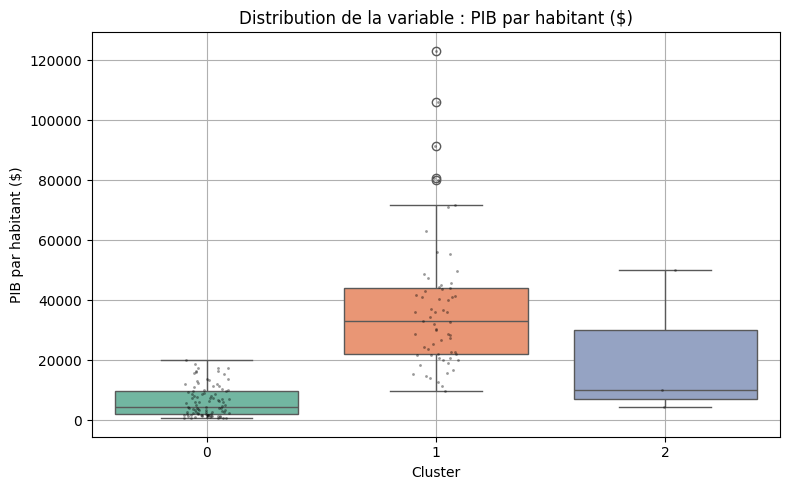

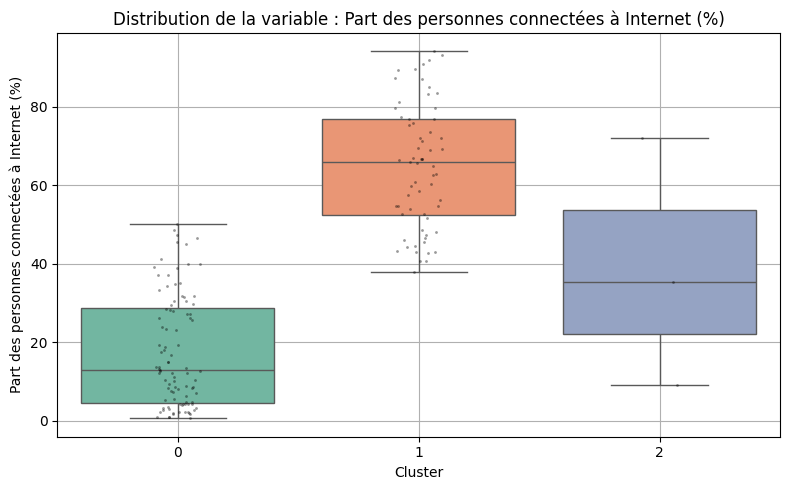

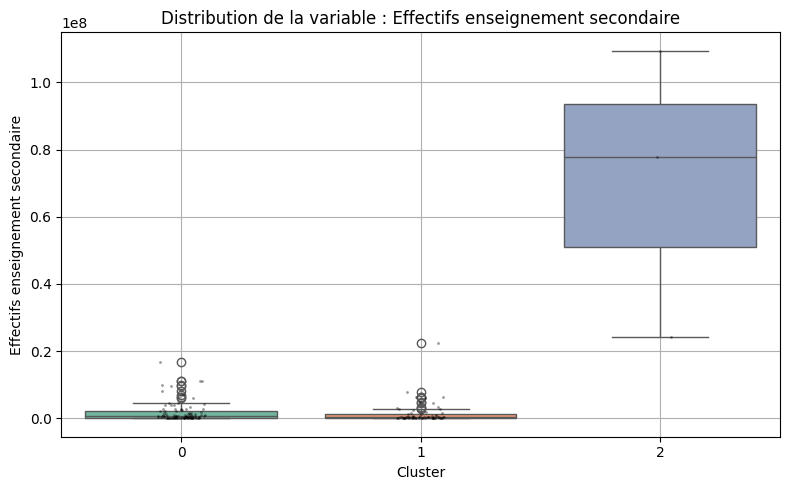

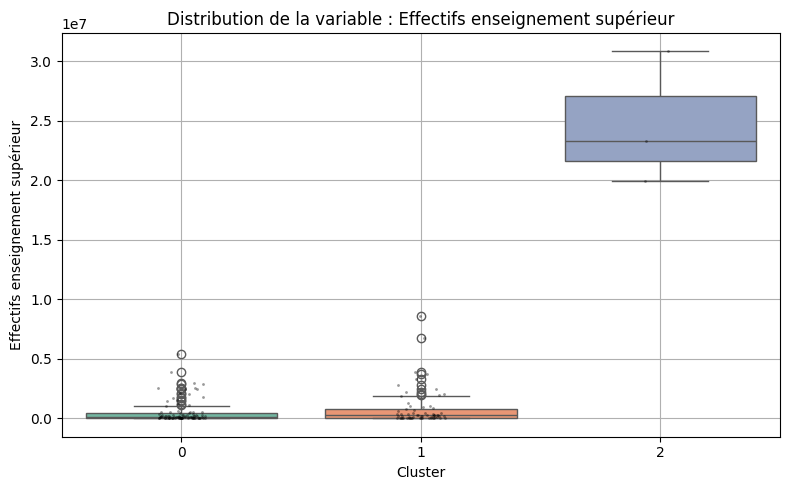

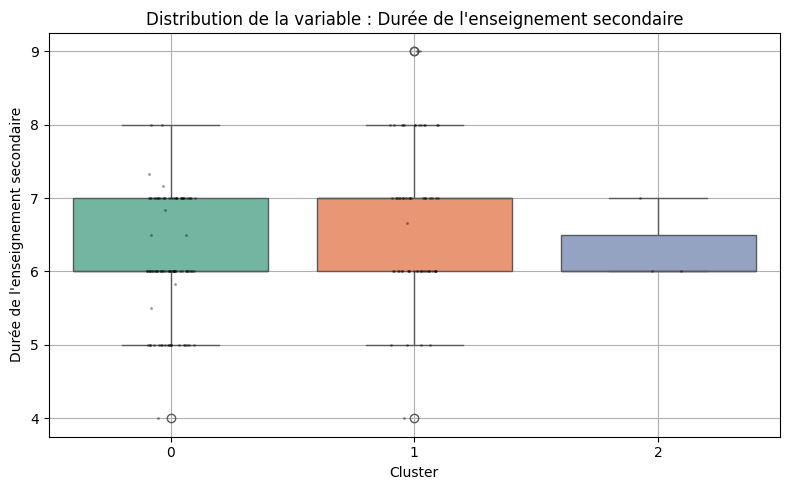

In [70]:
# Liste des variables
variables = ['PIB par habitant ($)',
             'Part des personnes connectées à Internet (%)',
             'Effectifs enseignement secondaire',
             'Effectifs enseignement supérieur',
             "Durée de l'enseignement secondaire"]

# Afficher les boxplots pour chaque variable
for col in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=col, hue='Cluster', data=df_ACP, palette='Set2', legend=False)
    sns.stripplot(x='Cluster', y=col, data=df_ACP, color='black', size=2, jitter=True, alpha=0.4)
    plt.title(f'Distribution de la variable : {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Aux vues des analyses réalisées, le groupe 1 semble être le groupe de pays avec un fort potentiel d'implantation, il est le groupe avec le PIB par habitant le plus important indiquant un pouvoir d'achat important, il est aussi le groupe avec la part des personnes connectées à Internet la plus importante, indiquant que ces pays sont prêt à accueillir un produit comme celui d'academy, enfin il est le groupe avec la durée d'enseignement dans le secondaire la plus longue permettant de capter une cible pour une durée plus importante.

Nous allons donc nous focaliser sur ce groupe 1 afin d'en extraire les pays les plus intéressant pour l'implantation d'academy.

Pour cela, nous attribuons un score à chaque pays du groupe, basé sur les valeurs de l’ensemble des variables. Concrètement, chaque pays est classé pour chaque variable (sous forme de quantile), puis nous calculons la moyenne de ces rangs pour obtenir un score global. Plus ce score est élevé, plus le pays est considéré comme favorable à l’implantation.

In [108]:
top_indicateur = df_ACP[df_ACP['Cluster'] == 1].copy()

# Calcul des quantiles
for col in top_indicateur.columns:
    top_indicateur[col + '_quantile'] = top_indicateur[col].rank(pct=True, method='min')

    # Moyenne des quantiles
quantile_cols = [col for col in top_indicateur.columns if col.endswith('_quantile')]
top_indicateur['Score moyen (quantile)'] = top_indicateur[quantile_cols].mean(axis=1)

# Top 10 des pays les plus "intéressants"
top_5 = top_indicateur.sort_values(by='Score moyen (quantile)', ascending=False).round(2).head(5)

top_5

Indicator Name,PIB par habitant ($),Part des personnes connectées à Internet (%),Effectifs enseignement secondaire,Effectifs enseignement supérieur,Durée de l'enseignement secondaire,Cluster,PIB par habitant ($)_quantile,Part des personnes connectées à Internet (%)_quantile,Effectifs enseignement secondaire_quantile,Effectifs enseignement supérieur_quantile,Durée de l'enseignement secondaire_quantile,Cluster_quantile,Score moyen (quantile)
Country Name,,,,,,,,,,,,,
Germany,41438.62,81.13,6074760.17,2780012.75,9.0,1,0.69,0.83,0.94,0.92,0.98,0.02,0.73
United Kingdom,36868.74,84.94,4589438.67,2433029.17,7.0,1,0.59,0.88,0.91,0.91,0.50,0.02,0.63
France,37169.40,76.79,4731632.67,2246063.17,7.0,1,0.61,0.75,0.92,0.89,0.50,0.02,0.61
Austria,43987.88,76.81,449672.76,350700.20,8.0,1,0.75,0.77,0.58,0.61,0.78,0.02,0.58
Japan,35939.45,79.73,6438681.83,3879516.83,6.0,1,0.55,0.81,0.97,0.97,0.09,0.02,0.57


Outre la France, les pays qui semblent avoir le potentiel le plus fort pour l'implantation d'academy sont : 
- L'Allemagne
- Le Royaume-Uni
- L'Autriche
- Le Japon

Ces pays présentent des caractéristiques proches de celle de la France, un PIB par habitant important, une bonne couverture internet, des effectifs dans l'enseignement secondaire et supérieur importants. L'Autriche présente des effectifs dans l'enseignement secondaire et supérieur près de 10 fois moins important que les autres pays, toutefois, la durée théorique de l'enseignement secondaire est plus longue que dans la plupart des pays et son PIB par habitant est le plus élevé. 

In [128]:
Liste_Indicateur_Proj = ['Internet users (per 100 people)',
                          'GDP per capita, PPP (constant 2011 international $)',
                          'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total',
                          'Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total'
                        ]

Liste_Pays_Group2 = df_ACP[df_ACP['Cluster']==2].index

In [142]:
df_group2 = df_data[df_data['Indicator Code'].isin(df_series[df_series['Indicator Name'].isin(Liste_Indicateur_Proj)]['Series Code'].tolist())]

In [148]:
df_group2 = df_group2[df_group2['Country Name'].isin(Liste_Pays_Group2)]

In [153]:
df_group2 = df_group2[['Country Name','Indicator Name','2008','2009','2010','2011','2012','2013','2020','2025','2030','2035','2040']]

In [155]:
df_group2

,Country Name,Indicator Name,2008,2009,2010,2011,2012,2013,2020,2025,2030,2035,2040
243136,China,"GDP per capita, PPP (constant 2011 internation...",7947.787952,8651.725901,9525.818483,10384.366599,11145.751575,11951.247959,NaN,NaN,NaN,NaN,NaN
243265,China,Internet users (per 100 people),22.600000,28.900000,34.300000,38.300000,42.300117,45.800000,NaN,NaN,NaN,NaN,NaN
245312,China,Wittgenstein Projection: Percentage of the pop...,NaN,NaN,0.360000,NaN,NaN,NaN,0.44,0.48,0.52,0.56,0.60
245324,China,Wittgenstein Projection: Percentage of the pop...,NaN,NaN,0.170000,NaN,NaN,NaN,0.22,0.25,0.28,0.31,0.34
415391,India,"GDP per capita, PPP (constant 2011 internation...",3786.632677,4049.805115,4404.697005,4635.879137,4827.559656,5073.605489,NaN,NaN,NaN,NaN,NaN
415520,India,Internet users (per 100 people),4.380000,5.120000,7.500000,10.070000,12.580061,15.100000,NaN,NaN,NaN,NaN,NaN
417567,India,Wittgenstein Projection: Percentage of the pop...,NaN,NaN,0.350000,NaN,NaN,NaN,0.42,0.46,0.49,0.53,0.56
417579,India,Wittgenstein Projection: Percentage of the pop...,NaN,NaN,0.110000,NaN,NaN,NaN,0.13,0.14,0.16,0.17,0.19
847861,United States,"GDP per capita, PPP (constant 2011 internation...",50383.840560,48557.867645,49372.619204,49790.665478,50519.526606,51008.459971,NaN,NaN,NaN,NaN,NaN
847990,United States,Internet users (per 100 people),74.000000,71.000000,71.690000,69.729461,74.700000,71.400000,NaN,NaN,NaN,NaN,NaN


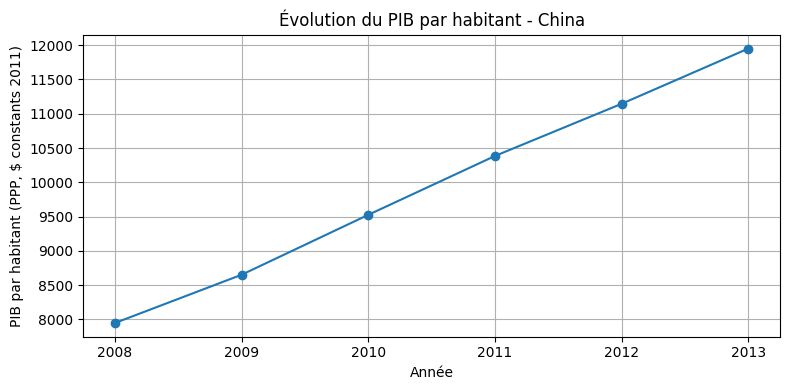

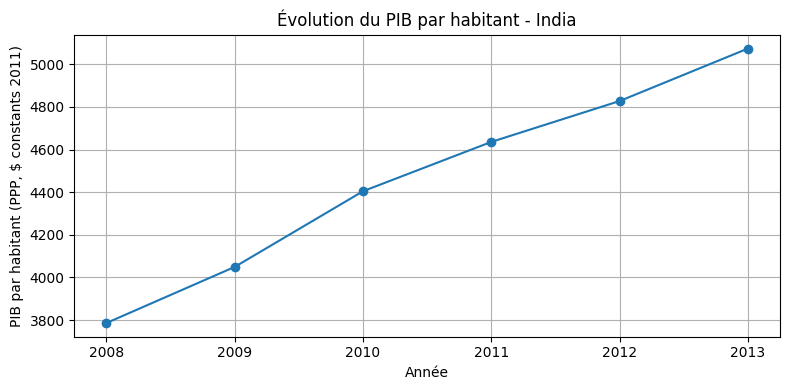

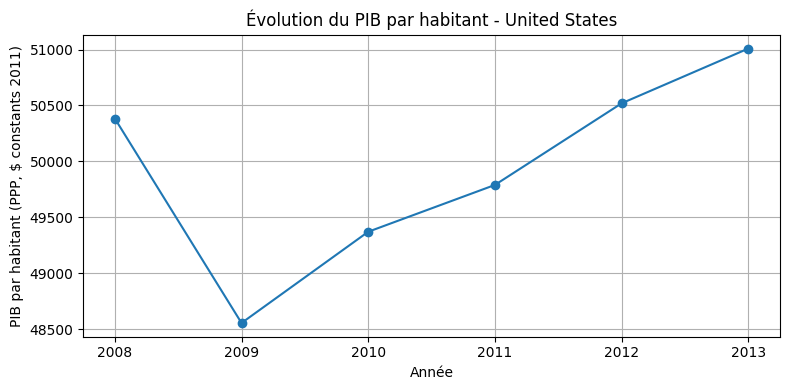

In [157]:
# Filtrer pour ne garder que les lignes correspondant au PIB par habitant
gdp_df = df_group2[df_group2['Indicator Name'].str.contains("GDP per capita, PPP")].copy()

# Liste des années
years = [col for col in gdp_df.columns if col.isdigit()]

# Pour chaque pays, tracer son propre graphique
for country in gdp_df['Country Name'].unique():
    country_data = gdp_df[gdp_df['Country Name'] == country]
    if not country_data.empty:
        values = country_data[years].values.flatten()

        # Vérifier qu'on a au moins une valeur non nulle pour tracer
        if pd.notnull(values).any():
            plt.figure(figsize=(8, 4))
            plt.plot(years, values, marker='o')
            plt.title(f"Évolution du PIB par habitant - {country}")
            plt.xlabel("Année")
            plt.ylabel("PIB par habitant (PPP, $ constants 2011)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

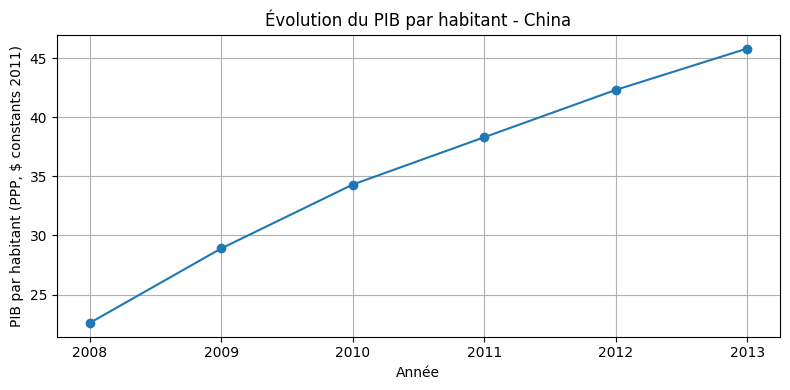

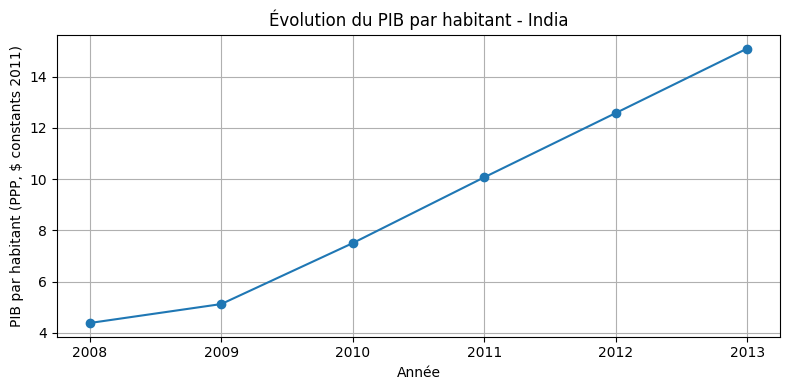

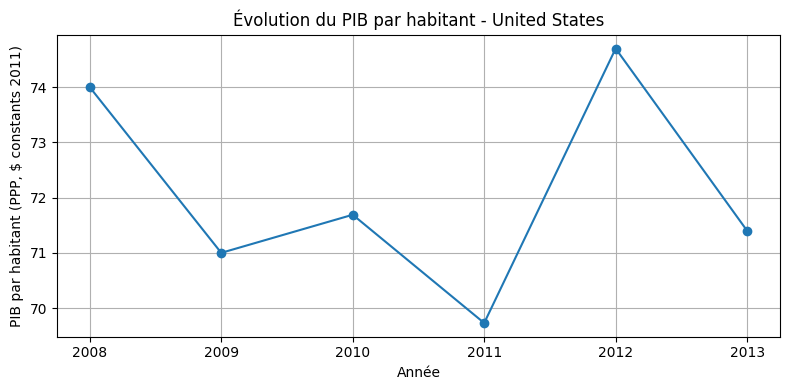

In [159]:
# Filtrer pour ne garder que les lignes correspondant au PIB par habitant
gdp_df = df_group2[df_group2['Indicator Name'].str.contains("Internet")].copy()

# Liste des années
years = [col for col in gdp_df.columns if col.isdigit()]

# Pour chaque pays, tracer son propre graphique
for country in gdp_df['Country Name'].unique():
    country_data = gdp_df[gdp_df['Country Name'] == country]
    if not country_data.empty:
        values = country_data[years].values.flatten()

        # Vérifier qu'on a au moins une valeur non nulle pour tracer
        if pd.notnull(values).any():
            plt.figure(figsize=(8, 4))
            plt.plot(years, values, marker='o')
            plt.title(f"Évolution du PIB par habitant - {country}")
            plt.xlabel("Année")
            plt.ylabel("PIB par habitant (PPP, $ constants 2011)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

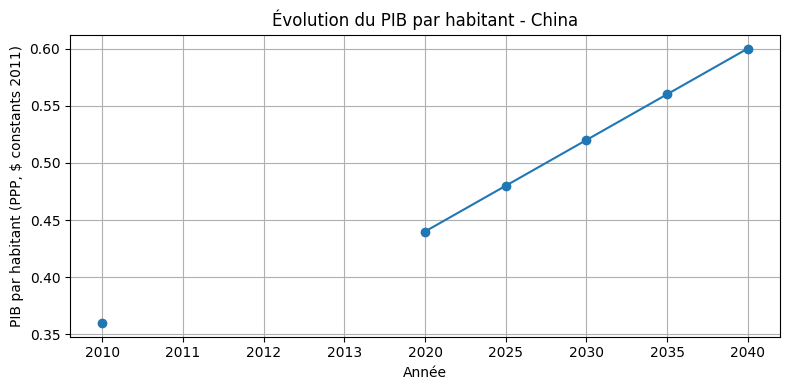

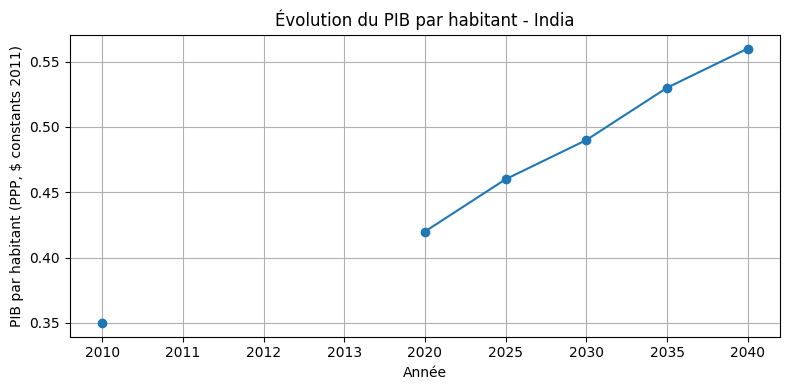

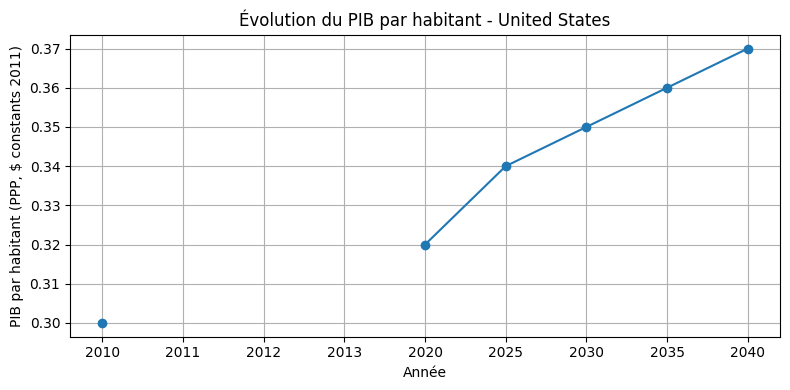

In [160]:
# Filtrer pour ne garder que les lignes correspondant au PIB par habitant
gdp_df = df_group2[df_group2['Indicator Name'].str.contains("15-19")].copy()

# Liste des années
years = [col for col in gdp_df.columns if col.isdigit()]

# Pour chaque pays, tracer son propre graphique
for country in gdp_df['Country Name'].unique():
    country_data = gdp_df[gdp_df['Country Name'] == country]
    if not country_data.empty:
        values = country_data[years].values.flatten()

        # Vérifier qu'on a au moins une valeur non nulle pour tracer
        if pd.notnull(values).any():
            plt.figure(figsize=(8, 4))
            plt.plot(years, values, marker='o')
            plt.title(f"Évolution du PIB par habitant - {country}")
            plt.xlabel("Année")
            plt.ylabel("PIB par habitant (PPP, $ constants 2011)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

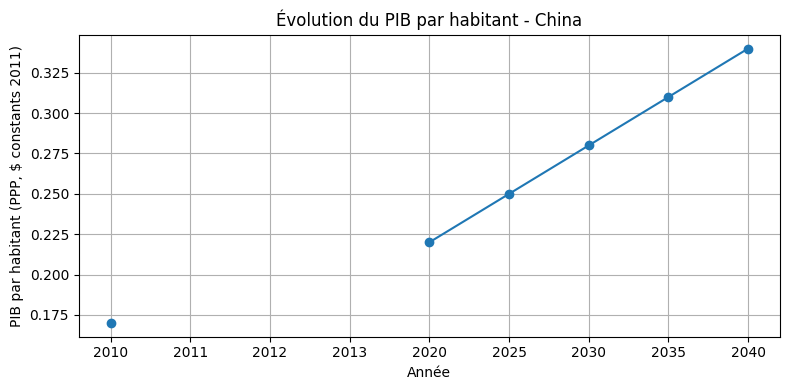

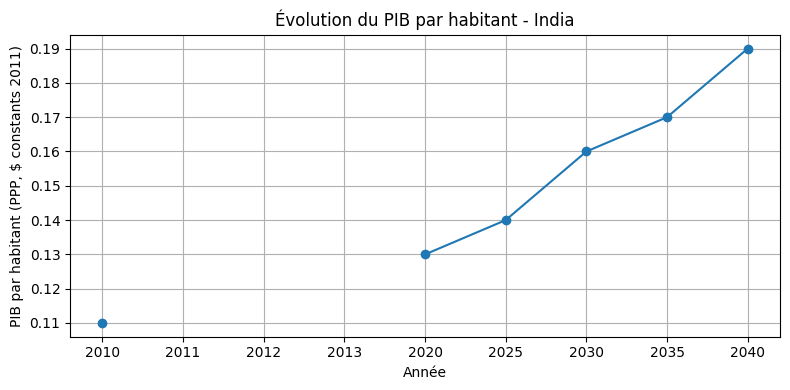

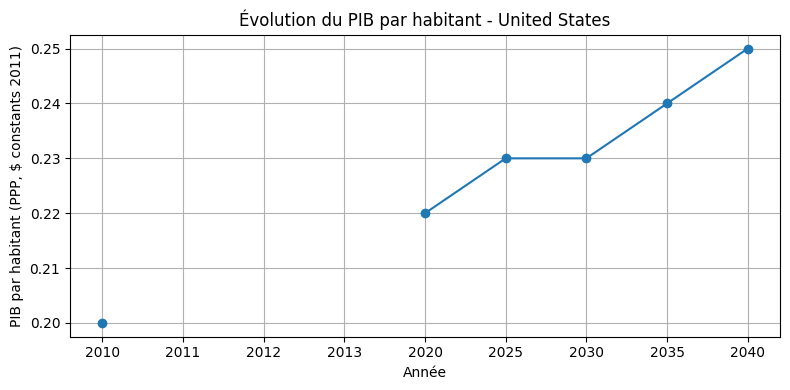

In [161]:
# Filtrer pour ne garder que les lignes correspondant au PIB par habitant
gdp_df = df_group2[df_group2['Indicator Name'].str.contains("20-24")].copy()

# Liste des années
years = [col for col in gdp_df.columns if col.isdigit()]

# Pour chaque pays, tracer son propre graphique
for country in gdp_df['Country Name'].unique():
    country_data = gdp_df[gdp_df['Country Name'] == country]
    if not country_data.empty:
        values = country_data[years].values.flatten()

        # Vérifier qu'on a au moins une valeur non nulle pour tracer
        if pd.notnull(values).any():
            plt.figure(figsize=(8, 4))
            plt.plot(years, values, marker='o')
            plt.title(f"Évolution du PIB par habitant - {country}")
            plt.xlabel("Année")
            plt.ylabel("PIB par habitant (PPP, $ constants 2011)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()